In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 

In [2]:
df=pd.read_csv("Dhaka Rent.csv",sep=";")
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [3]:
df.shape

(60, 2)

In [4]:
x=df['area']
y=df['rent']

In [5]:
x.head(2)

0    2000
1    2100
Name: area, dtype: int64

In [6]:
y.head(2)

0    31500
1    35000
Name: rent, dtype: int64

In [7]:
mean_x=np.mean(x)
mean_y=np.mean(y)

In [8]:
mean_x

2289.0

In [9]:
mean_y

37269.166666666664

In [10]:
dev_x=x-mean_x
dev_y=y-mean_y

In [11]:
m=np.sum(dev_x*dev_y)/np.sum(dev_x**2)
m

21.292661473611954

In [12]:
c=mean_y-(m*mean_x)
c

-11469.7354464311

In [13]:
prd_2250=m*2250+c
prd_2250

36438.7528691958

Text(0.5, 1.0, 'Area vs Rent')

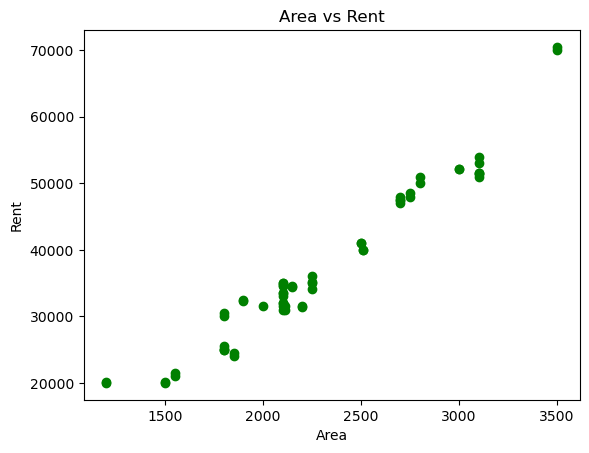

In [14]:
plt.scatter(x,y,color='green')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Area vs Rent')

In [15]:
df.corr()

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


In [16]:
df.describe()

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
reg=LinearRegression()

In [19]:
reg.fit(df[['area']],df['rent'])

LinearRegression()

In [20]:
reg.predict([[2250]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36438.7528692])

In [21]:
m=reg.coef_
m

array([21.29266147])

In [22]:
c=reg.intercept_
c

-11469.735446431114

In [23]:
df['Predicted']=reg.predict(df[['area']])

In [24]:
df.head(3)

,area,rent,Predicted
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238


In [25]:
df['residuals'] = df['rent'] - df['Predicted']
df.head()

,area,rent,Predicted,residuals
0,2000,31500,31115.587501,384.412499
1,2100,35000,33244.853648,1755.146352
2,2500,41050,41761.918238,-711.918238
3,2250,36100,36438.752869,-338.752869
4,3000,52100,52408.248974,-308.248974


In [26]:
from sklearn.model_selection import train_test_split as tts

In [27]:
train, test = tts(df, test_size=.30)

In [28]:
train.head()

,area,rent,Predicted,residuals
32,2500,41100,41761.918238,-661.918238
12,2100,34500,33244.853648,1255.146352
14,2250,34100,36438.752869,-2338.752869
15,3100,51500,54537.515122,-3037.515122
39,2100,31500,33244.853648,-1744.853648


In [29]:
xtrain, xtest, ytrain, ytest = tts(df[['area']], df[['rent']], train_size=.70, random_state=42)

In [30]:
xtrain.head(3)

,area
40,2150
4,3000
43,2510


In [31]:
ytrain.head(3)

,rent
40,34400
4,52100
43,40000


In [32]:
xtest.head()

,area
0,2000
5,1900
36,1500
45,3100
13,2510


In [33]:
ytest.head()

,rent
0,31500
5,32500
36,20200
45,51000
13,40050


In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [35]:
MSE=mean_squared_error(df[['Predicted']],df['rent'])
MSE

6778077.204095561

In [36]:
MAE=mean_absolute_error(df[['Predicted']],df['rent'])
MAE

2009.8695093576282

Text(0.5, 1.0, 'Area vs Rent')

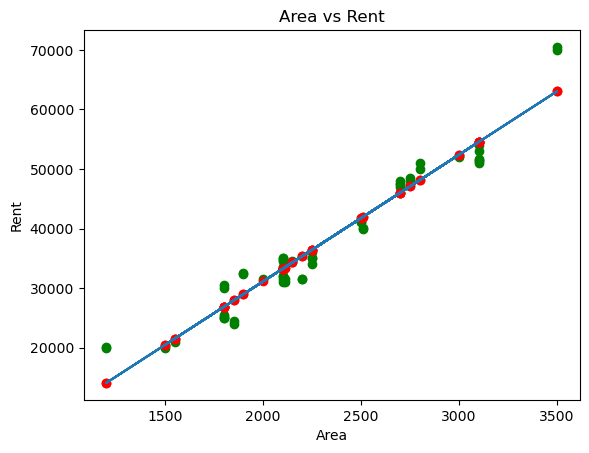

In [37]:
plt.scatter(x,y,color='green')
plt.plot(x,df.Predicted)
plt.scatter(x,df.Predicted,color='red')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Area vs Rent')

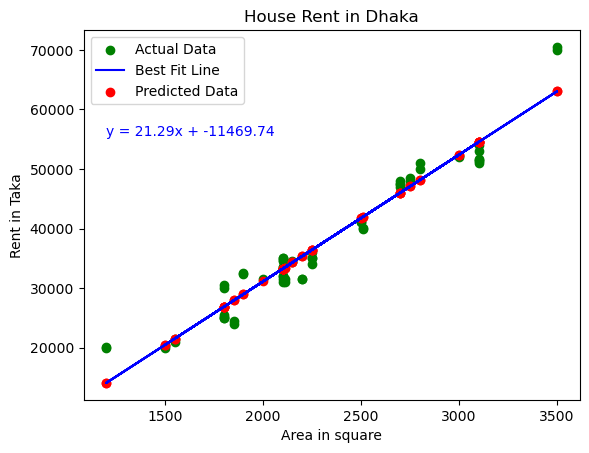

In [38]:
m = reg.coef_[0]  
c = reg.intercept_  

#equation of the line
equation = f"y = {m:.2f}x + {c:.2f}"

# plot the data
plt.scatter(df['area'], df['rent'], color='green', label="Actual Data")  # Original data points
plt.plot(df['area'], reg.predict(df[['area']]), color='blue', label="Best Fit Line")  # Regression line
plt.scatter(df['area'], reg.predict(df[['area']]), color='red', label="Predicted Data")  # Predicted points

plt.xlabel('Area in square')
plt.ylabel('Rent in Taka')
plt.title('House Rent in Dhaka')
plt.text(min(df['area']), max(df['rent']) - 15000, equation, fontsize=10, color='blue')  # Display equation on plot

# Adding a legend
plt.legend()

# Showing the plot
plt.show()